Each set of experiments shares a common folder. All folders are in the same directory as this notebook.

The folder should include result JSON file of all experiments. Every file should have similar filenames, like `threadpool16-4-32.json`, `threadpool16-16-32.json`, etc.

The output is a PNG figure file. In the previous example, the output should be `threadpool16-4-32.png`, `threadpool16-16-32.png`, etc.

The notebook follows the steps below:

Step 1: define the name of the experiment set, and give the format of all experiment of the set.

In [1]:
set_id = "231007_1"
set_name = "2xl"
set_run = '8'

file_name = set_id + "/"+ set_name + "-" + set_run
file_name

'231007_1/2xl-8'

Step 2: Open the JSON file and parse throughput percentiles on all workers.

In [2]:
import json

with open(file_name + '.json', 'r') as fr:
    json_data = json.load(fr)
    node_results = json_data['results']['nodeResults']
    percentiles = json_data['results']['throughputPercentiles']
str(percentiles)

'[204, 419, 442, 457, 468, 477, 484, 491, 497, 503, 508, 513, 517, 522, 526, 529, 533, 537, 540, 544, 547, 550, 553, 556, 559, 562, 565, 567, 570, 573, 575, 578, 581, 583, 586, 588, 591, 593, 596, 598, 601, 603, 606, 608, 611, 613, 616, 618, 621, 623, 626, 628, 631, 633, 636, 638, 641, 644, 646, 649, 652, 654, 657, 660, 663, 665, 668, 671, 674, 677, 680, 684, 687, 690, 694, 697, 701, 705, 709, 713, 717, 721, 726, 730, 735, 741, 746, 752, 758, 765, 772, 781, 789, 799, 811, 825, 841, 862, 889, 936, 1660]'

Step 3: Read throughput percentiles on each worker.

In [3]:
percentiles_per_node = []
for worker in node_results.keys():
    percentiles_per_node.append({
        'Worker': worker,
        'Percentiles': node_results[worker]['throughputPercentiles']
    })

Step 4: Draw the distribution graph, show and save the generated figure.

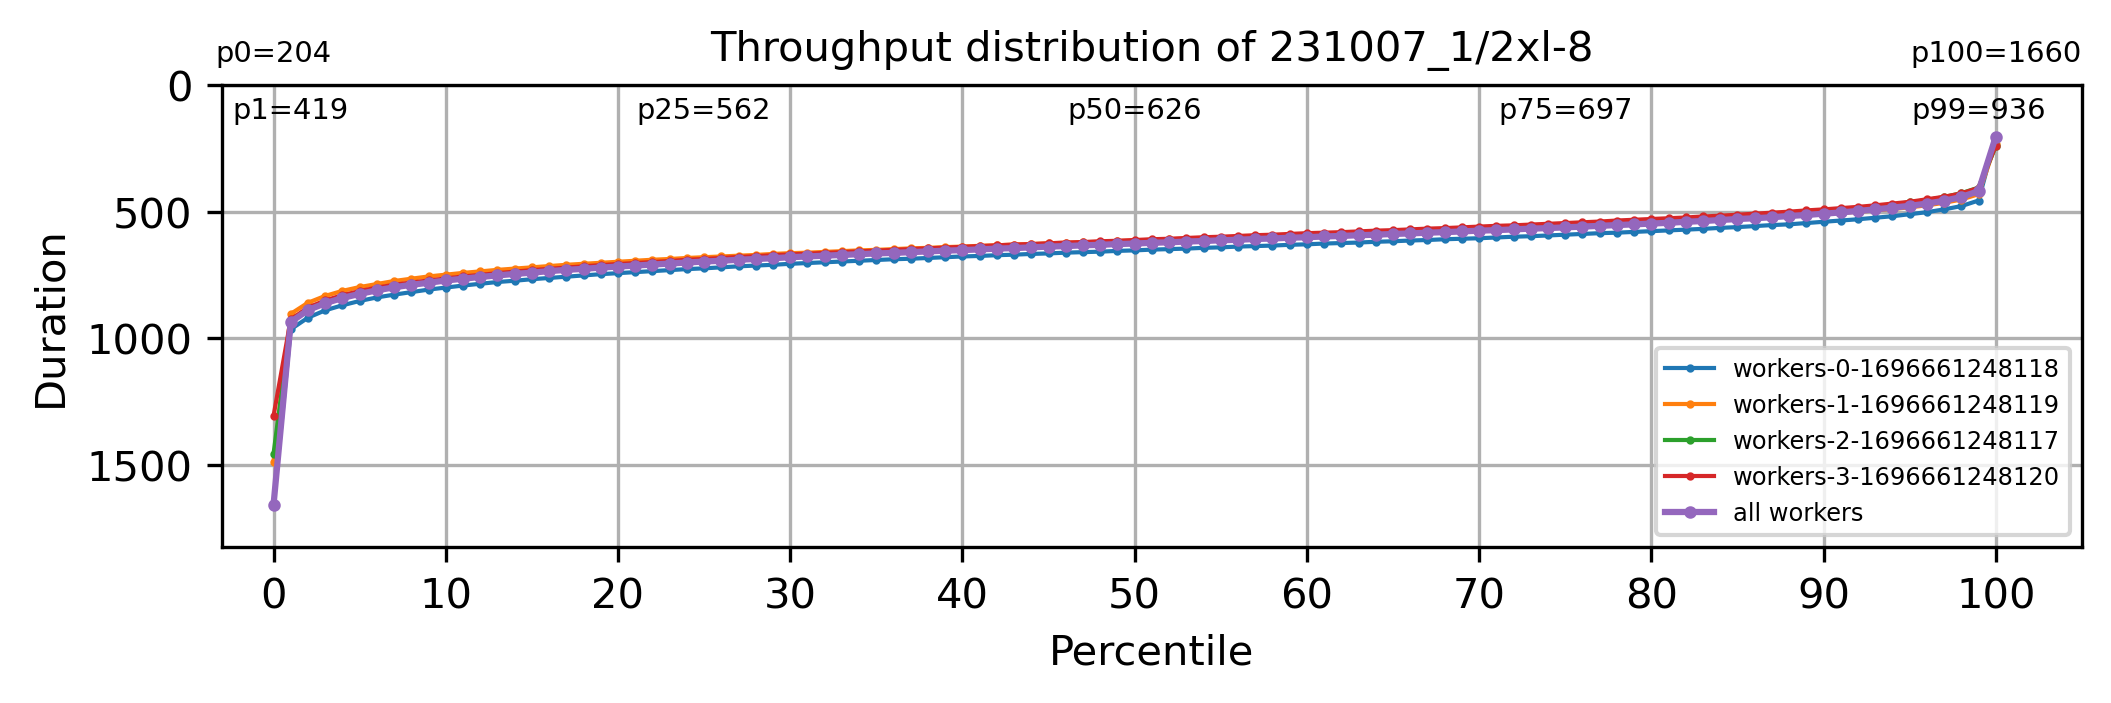

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(dpi=300, figsize=(8, 2))

plt.title("Throughput distribution of " + file_name, fontsize='medium')

plt.xlabel("Percentile", fontsize='medium')
plt.xticks(np.arange(0, 101, step=10), fontsize='medium')
plt.xlim(-3, 105)

plt.ylabel("Duration", fontsize='medium')
plt.ylim(percentiles[100]*1.1, 0)

plt.grid()

for node in percentiles_per_node:
    plt.plot(range(100, -1, -1), node['Percentiles'], 
             label=node['Worker'].replace("StressWorkerBenchCluster-", ""),
             linewidth=1, marker='.', markersize=2)
plt.plot(range(100, -1, -1), percentiles,
         label="all workers",
         linewidth=1.5, marker='.', markersize=4)

for show_percentile in [1, 25, 50, 75, 99]:
    plt.text(range(101)[show_percentile], percentiles[99]*0.14, 
             "p" + str(range(101)[show_percentile]) + "=" + str(percentiles[show_percentile]),
             ha='center', fontsize='x-small')
plt.text(0, percentiles[99]*-0.1,
         "p0=" + str(percentiles[0]),
         ha='center', fontsize='x-small')
plt.text(100, percentiles[99]*-0.1,
         "p100=" + str(percentiles[100]),
         ha='center', fontsize='x-small')
plt.legend(loc="lower right", fontsize='xx-small', ncol=1)

plt.savefig(file_name + '.png')
plt.show()

Step 5: Get all coarse data points and generate a DataFrame, can be used for further analysis.

In [5]:
import pandas as pd

datapoints = []
for worker in node_results.keys():
    for coarse_datapoint in node_results[worker]['dataPoints']:
        for i, datapoint in enumerate(coarse_datapoint['data']):
            datapoints.append([str(coarse_datapoint['wid']), str(coarse_datapoint['tid']), str(i),
                              str(datapoint['count']), str(datapoint['iobytes'])])
data_frame = pd.DataFrame(datapoints)
data_frame.columns = ['worker ID', 'thread ID', 'slice ID', 'count', 'IO Bytes']

data_frame['worker-thread'] = data_frame['worker ID'] + "-" + data_frame['thread ID']
data_frame

,worker ID,thread ID,slice ID,count,IO Bytes,worker-thread
0,0,27,0,21,704643072,0-27
1,0,27,1,19,637534208,0-27
2,0,27,2,19,637534208,0-27
3,0,27,3,20,671088640,0-27
4,0,27,4,19,637534208,0-27
...,...,...,...,...,...,...
9595,3,23,295,20,671088640,3-23
9596,3,23,296,18,603979776,3-23
9597,3,23,297,18,603979776,3-23
9598,3,23,298,19,637534208,3-23
